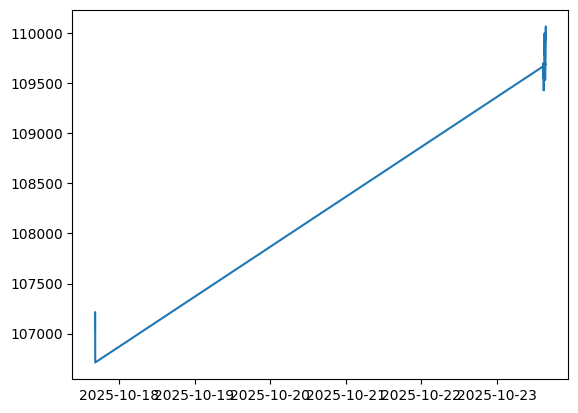

In [4]:
# Launch this cell to quickly vizualize data
from pymongo import MongoClient
SYMBOLS = ["btcusdt", "ethusdt", "bnbusdt", "solusdt"] 
mongo_client = MongoClient(
    host = "127.0.0.1",
    port = 27017,
    username = "datascientest", # TODO use env
    password = "dst123"         # TODO use env
)
db = mongo_client['binance_klines']
collection = db['btcusdt']

klines = collection.find()

prices,dates = [],[]
for kline in klines:
    prices.append(kline['close'])
    dates.append(kline['timestamp'])

import matplotlib.pyplot as plt

plt.plot(dates,prices)
plt.show()

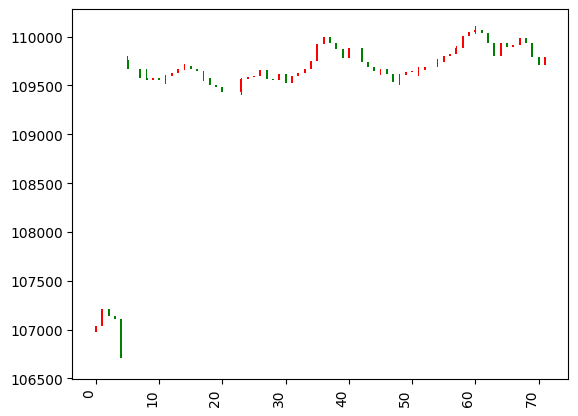

In [6]:
import pandas as pd
klines = collection.find()
df = pd.DataFrame(list(klines))
plt.figure()

# "up" dataframe will store the stock_prices 
# when the closing stock price is greater
# than or equal to the opening stock prices
up = df[df.close >= df.open]

# "down" dataframe will store the stock_prices
# when the closing stock price is
# lesser than the opening stock prices
down = df[df.close < df.open]

# When the stock prices have decreased, then it
# will be represented by blue color candlestick
col1 = 'red'
col2 = 'green'

# Setting width of candlestick elements
width = .3
width2 = .03

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree 
# towards right
plt.xticks(rotation=90, ha='right')

# displaying candlestick chart of stock data 
# of a week
plt.show()